## Basic Import 

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12,6)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSV file /Diamonds Prices2022.csv')

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
df.columns 

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df['color'].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
df['clarity'].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [ ]:
df.columns 

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Rename columns x y z with length width and depth has the information given in the dataset 
### That x is lenght , y is width , z is depth

In [ ]:
df.rename(columns = {'x': 'length(mm)','y': 'width(mm)','z': 'depth(mm)'}, inplace = True)

In [ ]:
price_grp = df.groupby(['price','color']).size().reset_index()
price_grp

,price,color,0
0,326,E,2
1,327,E,1
2,334,I,1
3,335,J,1
4,336,I,1
...,...,...,...
26164,18803,H,1
26165,18804,G,1
26166,18806,G,1
26167,18818,G,1


In [ ]:
# sorts = price_grp.sort_values(ascending = False)

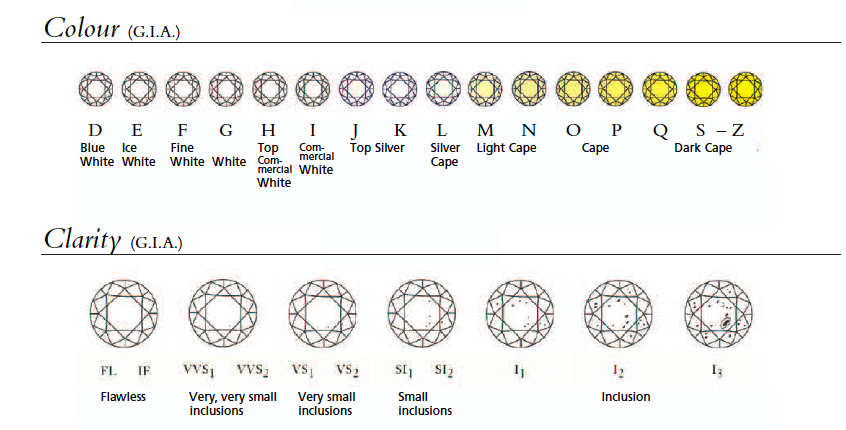

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/data science photos /colur of diamonds.png')

### As we can see the colour of diamonds with diffrent rating now we will find the distribution of the colour 

In [ ]:
colours = df.color.value_counts().index
values = df.color.value_counts().values

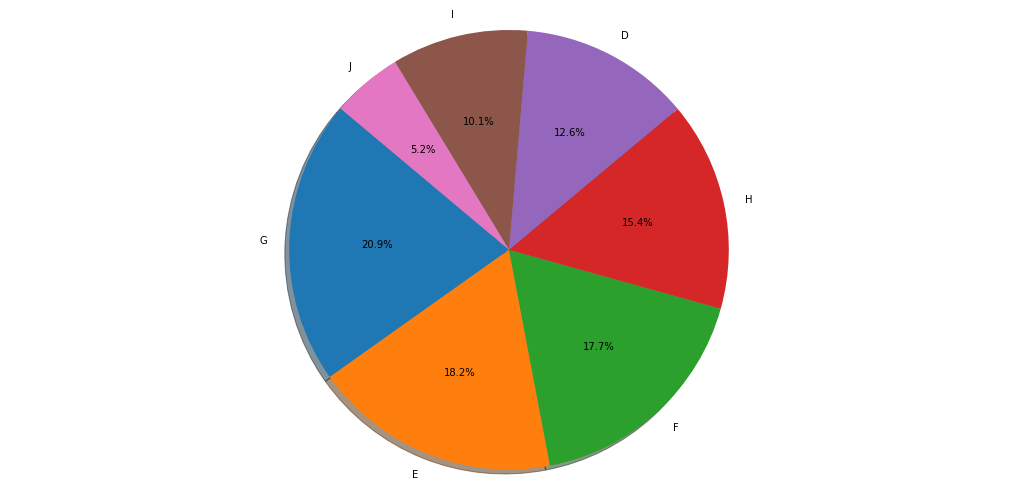

In [ ]:
plt.rcParams['figure.figsize'] = (18,9)
plt.pie(values , labels = colours, shadow = True, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

### Conclusion:
### As we can the distribution of the colour 
### 1. The most share taken in the dataset is G(20.9%) which is white colour 
### 2. we have found that color E (18.2%) is on second number i.e ice white colour 
### 3. And on the third place colour F is place with share of (17.7%)  
 

### Now we will find Top 5 sale with respect to the top three Distibution  

In [ ]:
cuts = df.cut.value_counts().index
values = df.cut.value_counts().values

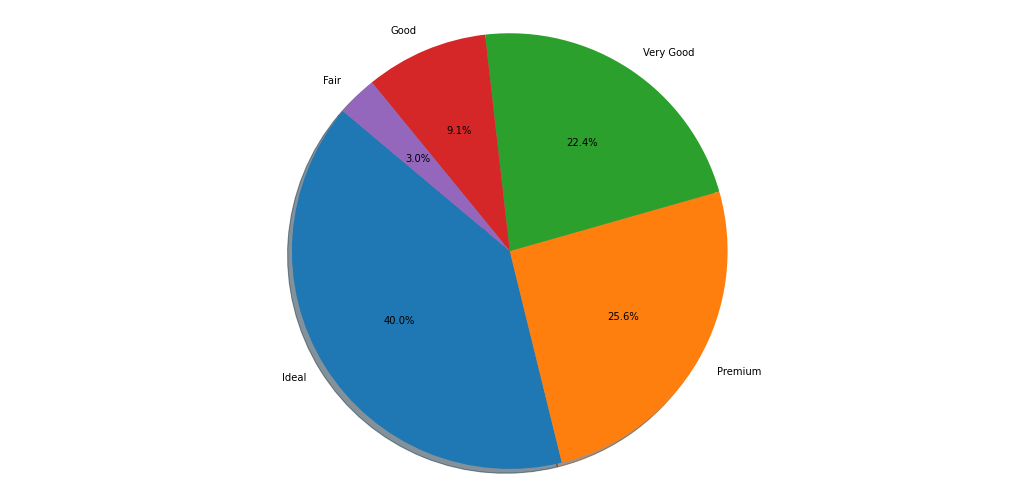

In [ ]:
plt.rcParams['figure.figsize'] = (18,9)
plt.pie(values , labels = cuts, shadow = True, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

### Conclusion:
### We have more data of ideal cuts i.e 40.0%
### On the second place we have Premium cuts which is 25.6%
### On third number we have Very Good cut 22.4%  

## Now we will change the clarity the column variable and convert then into range for better understanding 
## We will convert our clarity variable into the term of Image given below

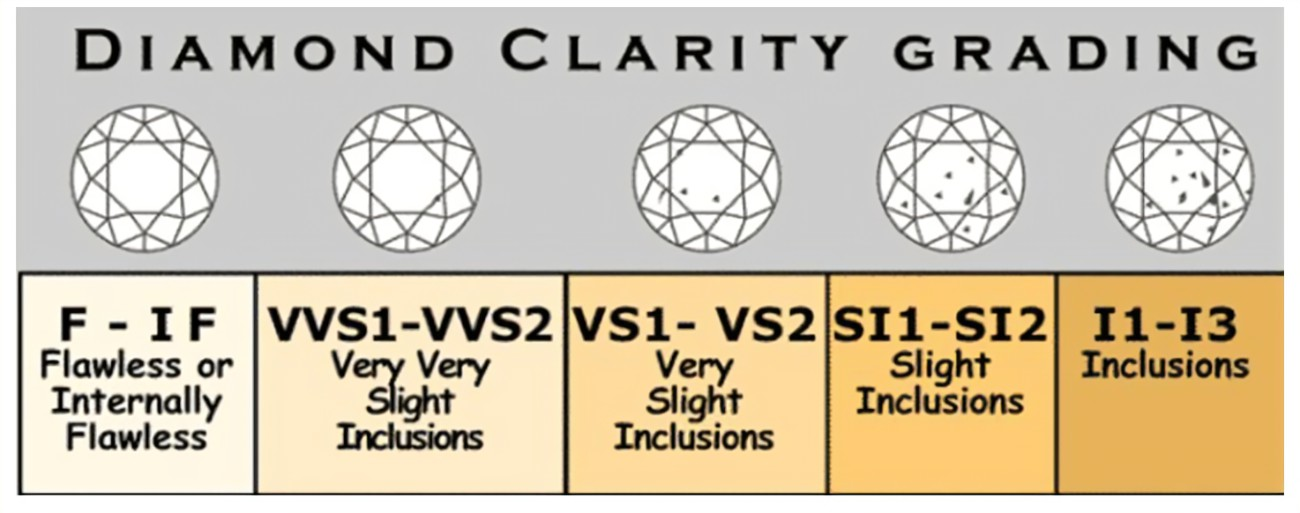

In [ ]:
Image('/content/drive/MyDrive/data science photos /Clarity of diamonds.jpg')

In [ ]:
clar_rang = []
clar = df['clarity']
for i in clar:
  if i == 'I1' or i == 'IF':
    clar_rang.append('I1-IF')
  if i == 'SI1' or i == 'SI2':
    clar_rang.append('SI1-SI2')
  if i == 'VS1' or i == 'VS2':
    clar_rang.append('VS1-VS2')
  if i == 'VVS1' or i == 'VVS2':
    clar_rang.append('VVS1-VVS2')

df['clarity-range'] = clar_rang

In [ ]:
clar_rng = df.groupby('clarity-range')

In [ ]:
clar_rng['price'].sum()

clarity-range
I1-IF         8035871
SI1-SI2      98762752
VS1-VS2      79487467
VVS1-VVS2    25857396
Name: price, dtype: int64

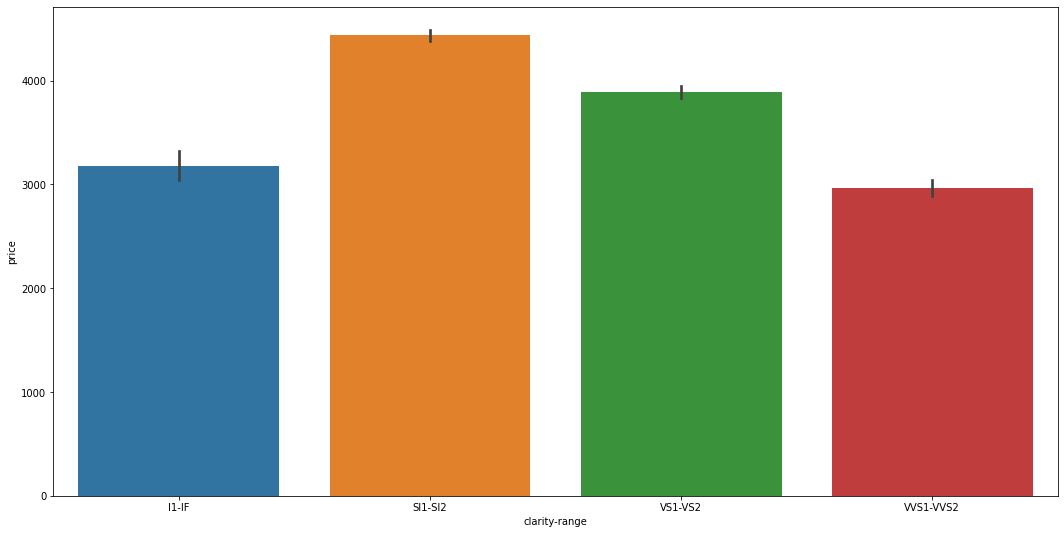

In [ ]:
order = ['I1-IF','SI1-SI2','VS1-VS2','VVS1-VVS2']
ax = sns.barplot(x = df['clarity-range'], y = df['price'], order = order)

### Conclusion:
### According to the data,The VVS1-VVS2 has very less price which is between 2700-3000
### After that we have Il-IF which is between 3000-3500
### After that we have VS1-VS2 which is between 3500 - 4000
### And the highest price in the data is for Sl1-Sl2 which is more than 4000

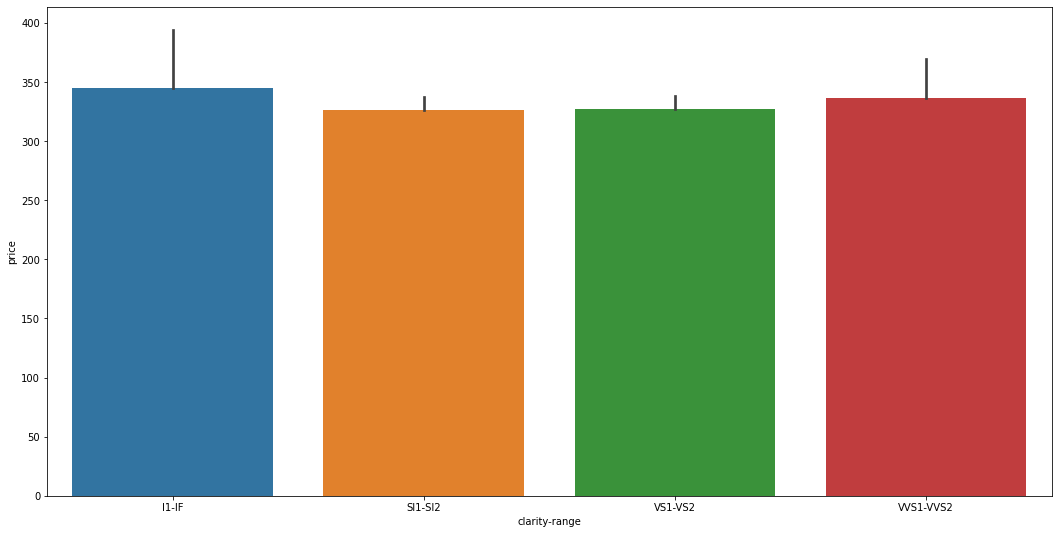

In [ ]:
 sns.barplot(x = df['clarity-range'], y = df['price'], order = order , estimator = np.min)

### Conclusion:
### The minimum value of IL-IF is around 340-400 
### The Sl1-SL2 showing the similar stats which is around 330-340
### The WS1-WS2 is slight higher which is around 340-360 

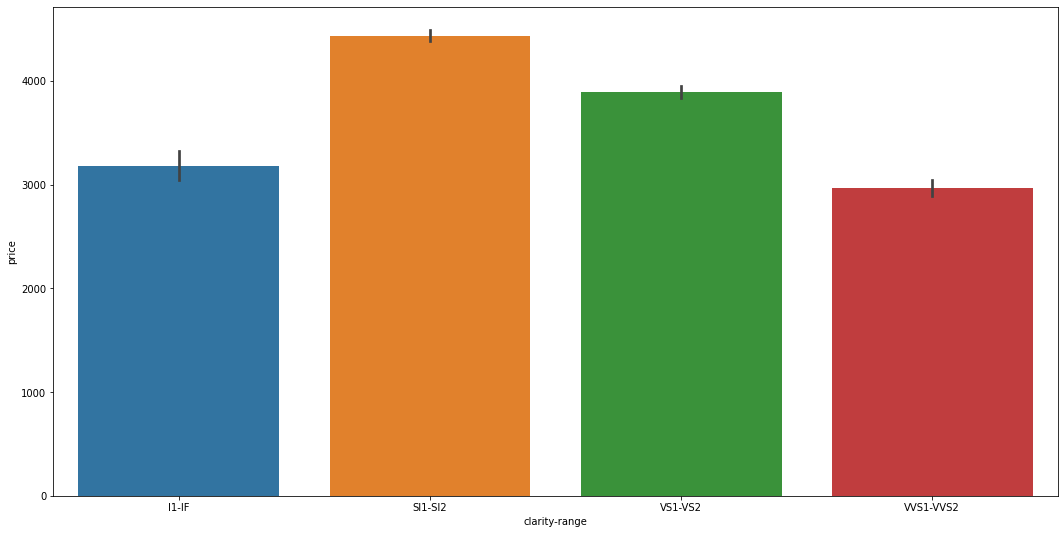

In [ ]:
sns.barplot(x = df['clarity-range'], y = df['price'], order = order , estimator = np.mean)

### Conclusion:
#### The averange price 
### 1.   Averange price of IL-IF 3300
### 2.   Averange price of SL1-SL2 4500
### 3.   Averange price of VS1-VS2 3700
### 4.   Averange price of VVS1-VVS2 3000



In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

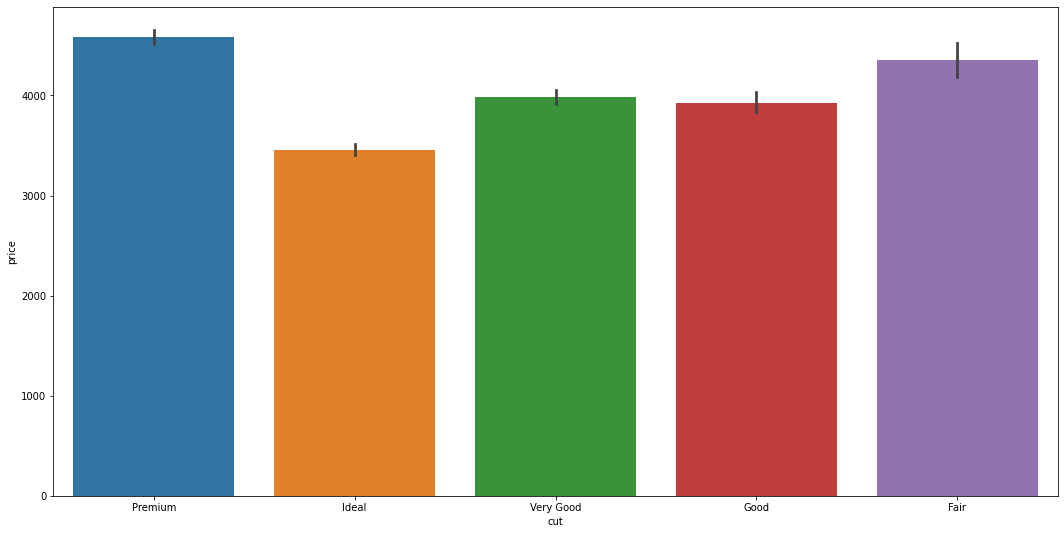

In [ ]:
order = ['Premium','Ideal','Very Good','Good', 'Fair']
ax = sns.barplot(x = df['cut'], y = df['price'] , data = df, order = order)

### Conclusion:
### The price of Premium cut diamonds are more than 4000
### The price of Ideal cut diamonds is around 3200 - 3500
### The price of Very Good and Good cut diamonds is similar around 3700-4000
### The price of Fair cut diamonds is around 4000 - 4300